In [242]:
# from sklearn import svm,metrics
# from sklearn.neighbors import KNeighborsClassifier # 분류
# from sklearn.neighbors import KNeighborsRegressor  # 회귀-예측
from sklearn.linear_model import LinearRegression  # 선형회귀
from sklearn.preprocessing import PolynomialFeatures # 다항특성을 만들어주는 라이브러리
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False  # 마이너스 표시 해결
# 한글설정
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # windows 사용자
# matplotlib.rcParams['font.family'] = 'AppleGothic Gothic' # Mac사용자
matplotlib.rcParams['font.size'] = '10' # 글자크기

In [243]:
from konlpy.tag import Okt
okt = Okt()
m_list = okt.pos("아버지 가방에 들어가셨세요.",stem=True)
print(m_list)

[('아버지', 'Noun'), ('가방', 'Noun'), ('에', 'Josa'), ('들어가다', 'Verb'), ('.', 'Punctuation')]


In [244]:
df = pd.read_csv('review_data.csv')
df

,score,review,y
0,5,新鮮でおいしいです。너무 맛있어요,1
1,4,녹는다 녹아,1
2,4,좋아요,1
3,5,흠잡을곳 없는 반찬이 정갈합니다,1
4,5,코로나 땜에 걱정했는데 방역수칙도 잘 지키시고 살치실이랑 등심 부드러워서 너무 좋아...,1
...,...,...,...
367,1,핵노맛 식당 분위기가 1점,0
368,5,깔끔친절죤맛,1
369,5,주말엔 점심특선 안 됨ㅠ 안 바쁠 때 가서 그런지 하나하나 잘 구워주시고 육즙 굿 ...,1
370,5,맛있고 직원분들이 친절해서 좋아요. 가성비도 좋음. 생각보다 고기가 많이서 한꺼번에...,1


In [245]:
# pos : 말뭉치, 품사, 튜플 형태로
# morghgf  모든 형태소 단위로 분리(어간 추출)
# nouns : 명사 추출

In [246]:
m_list = okt.pos("한글 자연어 처리는 재밌다 이제부터 열심히 해야지 ㅎㅎㅎ", stem=True)

In [247]:
t = okt.nouns("한글 자연어 처리는 재밌다 이제부터 열심히 해야지 ㅎㅎㅎ")
print(m_list)

[('한글', 'Noun'), ('자연어', 'Noun'), ('처리', 'Noun'), ('는', 'Josa'), ('재밌다', 'Adjective'), ('이제', 'Noun'), ('부터', 'Josa'), ('열심히', 'Adverb'), ('하다', 'Verb'), ('ㅎㅎㅎ', 'KoreanParticle')]


In [248]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372 entries, 0 to 371
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   score   372 non-null    int64 
 1   review  372 non-null    object
 2   y       372 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 8.8+ KB


In [249]:
df['y'].value_counts() # 긍정:1     부정:0

y
1    222
0    150
Name: count, dtype: int64

In [250]:
df.head()

,score,review,y
0,5,新鮮でおいしいです。너무 맛있어요,1
1,4,녹는다 녹아,1
2,4,좋아요,1
3,5,흠잡을곳 없는 반찬이 정갈합니다,1
4,5,코로나 땜에 걱정했는데 방역수칙도 잘 지키시고 살치실이랑 등심 부드러워서 너무 좋아...,1


In [251]:
import re
# 문자열 정리
# 한글을 제하고 모든 문자는 제거
def text_cleaning(test):
    hangul = re.compile('[^ ㄱ-ㅎ가-힣]')    # 빈공백, 한글 반대인 것 선택
    result = hangul.sub('',test)
    return result

In [252]:
df.columns

Index(['score', 'review', 'y'], dtype='object')

In [253]:
df['ko_text'] = df['review'].apply(lambda x: text_cleaning(x))

In [254]:
df['ko_text']

0                                                너무 맛있어요
1                                                 녹는다 녹아
2                                                    좋아요
3                                     흠잡을곳 없는 반찬이 정갈합니다 
4      코로나 땜에 걱정했는데 방역수칙도 잘 지키시고 살치실이랑 등심 부드러워서 너무 좋아...
                             ...                        
367                                        핵노맛 식당 분위기가 점
368                                               깔끔친절죤맛
369    주말엔 점심특선 안 됨 안 바쁠 때 가서 그런지 하나하나 잘 구워주시고 육즙 굿 미...
370    맛있고 직원분들이 친절해서 좋아요 가성비도 좋음 생각보다 고기가 많이서 한꺼번에 안...
371    새로 생겨서 정말 깨끗한 인테리어 마감시간에 지켜봤는데 다 깨끗이 청소하길래 신뢰 ...
Name: ko_text, Length: 372, dtype: object

In [255]:
# 한글자 이상의 텍스트를 가지고 데이터 추출
df = df[df['ko_text'].str.len()>0]
df.shape


(372, 4)

In [256]:
# 형태소 단위 추출
from konlpy.tag import Okt

# 형태소분석 함수생성
def get_pos(x):
    tagger = Okt()
    pos = tagger.pos(x) # (단어,품사) 튜플
    pos = ['{}/{}'.format(word,tag) for word,tag in pos]   # pos 튜플형태(단어,품사)
    return pos

In [257]:
# 형태소 추출 테스트
result = get_pos(df['ko_text'].values[0])
result

['너무/Adverb', '맛있어요/Adjective']

In [258]:
# CountVectorizer : 전체단어에서 각 단어에 번호를 부여
from sklearn.feature_extraction.text import CountVectorizer
index_vectorizer = CountVectorizer(tokenizer=lambda x: get_pos(x))
X = index_vectorizer.fit_transform(df['ko_text'].to_list())

c:\Python312\Lib\site-packages\sklearn\feature_extraction\text.py:523: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [259]:
# 형태소 분석이 된 단어 총 개수
X.shape

(372, 2343)

In [260]:
print(sorted(index_vectorizer.vocabulary_))


['ㄴ/KoreanParticle', 'ㄷㄷㄷ/KoreanParticle', 'ㄹㅇ/KoreanParticle', 'ㅂㅂ/KoreanParticle', 'ㅅ/KoreanParticle', 'ㅇㅇ/KoreanParticle', 'ㅈㄴ/KoreanParticle', 'ㅈㅁㅌㅌㄱㄹ/KoreanParticle', 'ㅋ/KoreanParticle', 'ㅋㅋ/KoreanParticle', 'ㅋㅋㅋ/KoreanParticle', 'ㅋㅋㅋㅋ/KoreanParticle', 'ㅋㅋㅋㅋㅋ/KoreanParticle', 'ㅎ/KoreanParticle', 'ㅎㅎ/KoreanParticle', 'ㅎㅎㅎ/KoreanParticle', 'ㅎㅎㅎㅎ/KoreanParticle', '가/Josa', '가/Verb', '가게/Noun', '가격/Noun', '가고/Verb', '가고싶지/Verb', '가급적/Adverb', '가기/Noun', '가까/Adjective', '가까히/Adjective', '가나/Noun', '가네요/Verb', '가는/Verb', '가는게/Verb', '가능/Noun', '가능하고/Adjective', '가득/Noun', '가득가득/Adverb', '가득해서/Adjective', '가려고요/Verb', '가려는데/Verb', '가맹/Noun', '가면/Noun', '가본/Verb', '가서/Verb', '가성/Noun', '가세/Noun', '가스/Noun', '가슴/Noun', '가시길/Verb', '가시는거라면/Verb', '가시던데/Verb', '가심/Verb', '가장/Noun', '가정/Noun', '가져가/Verb', '가져다/Verb', '가져다가/Verb', '가져다줄/Verb', '가족/Noun', '가지/Noun', '가진/Verb', '각/Noun', '간/Noun', '간/Suffix', '간곳/Noun', '간다/Noun', '간단하게/Adjective', '간하면/Verb', '갈/Verb', '갈릴/Noun', '갈만/Verb', '갈비

In [261]:
print(index_vectorizer.vocabulary_)

{'너무/Adverb': 411, '맛있어요/Adjective': 750, '녹는다/Verb': 430, '녹아/Verb': 431, '좋아요/Adjective': 1888, '흠잡을/Adjective': 2334, '곳/Noun': 178, '없는/Adjective': 1470, '반찬/Noun': 933, '이/Josa': 1640, '정갈합니다/Adjective': 1845, '코로나/Noun': 2075, '땜/Noun': 642, '에/Josa': 1492, '걱정/Noun': 131, '했는데/Verb': 2281, '방역/Noun': 945, '수/Modifier': 1199, '칙/Noun': 2053, '도/Josa': 544, '잘/Verb': 1769, '지키시고/Verb': 1953, '살치실이랑/Verb': 1132, '등심/Noun': 625, '부드러워서/Adjective': 1022, '좋아서/Adjective': 1887, '댓글/Noun': 527, '남깁니다/Verb': 383, '살치/Verb': 1131, '살/Noun': 1127, '미쳤네요/Adjective': 910, '대박/Noun': 515, '입니다/Adjective': 1727, '퀄리티/Noun': 2081, '굳이/Noun': 231, '에요/Josa': 1502, '최고/Noun': 2030, '외식/Noun': 1578, '하기에/Verb': 2179, '딱/Adverb': 631, '좋습니다/Adjective': 1885, '격/Noun': 145, '자체/Noun': 1764, '가/Josa': 17, '다른/Noun': 473, '음식/Noun': 1630, '의/Josa': 1633, '품격/Noun': 2160, '서비스/Noun': 1163, '마인드/Noun': 686, '뭐/Noun': 899, '하나/Noun': 2182, '정말/Noun': 1848, '멋진/Adjective': 830, '식당/Noun': 1247, '이네/Josa'

In [262]:
print(df['ko_text'].values[0])
print(X[0])

너무 맛있어요
  (0, 411)	1
  (0, 750)	1


In [263]:
# 변환기
from sklearn.feature_extraction.text import TfidfTransformer

# TF-IDF 방법으로, 형태소를 벡터 형태 데이터로 변환
tfidf_vectorizer = TfidfTransformer()
X=tfidf_vectorizer.fit_transform(X)

In [264]:
print(X.shape)
print(X[1])

(372, 2343)
  (0, 430)	0.7071067811865476
  (0, 431)	0.7071067811865476


In [265]:
print(X)

  (0, 411)	0.6576785255639858
  (0, 750)	0.7532987169854876
  (1, 430)	0.7071067811865476
  (1, 431)	0.7071067811865476
  (2, 1888)	1.0
  (3, 178)	0.3042004605770822
  (3, 933)	0.4174595892176754
  (3, 1470)	0.43039286289644935
  (3, 1640)	0.19025362148557404
  (3, 1845)	0.5225666594189886
  (3, 2334)	0.4885480536221607
  (4, 131)	0.27027309313102715
  (4, 383)	0.27027309313102715
  (4, 411)	0.14027794721287554
  (4, 527)	0.24019504854904306
  (4, 544)	0.10095305374438543
  (4, 625)	0.23051208095882778
  (4, 642)	0.27027309313102715
  (4, 945)	0.27027309313102715
  (4, 1022)	0.2526785649555473
  (4, 1132)	0.27027309313102715
  (4, 1199)	0.27027309313102715
  (4, 1492)	0.10860241748505198
  (4, 1769)	0.17740824814668021
  (4, 1887)	0.27027309313102715
  :	:
  (371, 1154)	0.17569017317347246
  (371, 1163)	0.24578160535331572
  (371, 1191)	0.14984365240753128
  (371, 1226)	0.12760302633895593
  (371, 1254)	0.17569017317347246
  (371, 1492)	0.21178997858018142
  (371, 1562)	0.1498436524075

In [281]:
from sklearn.model_selection import train_test_split
target = df['y']
train_input,test_input,train_target,test_target = train_test_split(X,target,test_size=0.3)

In [283]:
print(train_input.shape,test_input.shape)
print(train_target.shape,test_target.shape)

(260, 2343) (112, 2343)
(260,) (112,)


In [268]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=5, max_iter=30)
lr.fit(train_input,train_target)
print(lr.score(train_input,train_target))
print(lr.score(test_input,test_target))


0.9961538461538462
0.8392857142857143


In [269]:
from sklearn.linear_model import SGDClassifier
sf = SGDClassifier(loss='log_loss',max_iter=20,random_state=42)
sf.fit(train_input,train_target)
print(sf.score(train_input,train_target))
print(sf.score(test_input,test_target))

1.0
0.8392857142857143


In [270]:
sf.partial_fit(train_input,train_target)
print(sf.score(train_input,train_target))
print(sf.score(test_input,test_target))

1.0
0.8392857142857143


In [271]:
# 1. 
df['y'].value_counts()

y
1    222
0    150
Name: count, dtype: int64

In [280]:
print(lr.coef_,lr.intercept_)

[[ 0.         -0.256931    0.45790553 ...  0.          0.
  -0.20394114]] [0.5113314]


<BarContainer object of 2343 artists>

c:\Python312\Lib\site-packages\matplotlib\_tight_bbox.py:67: RuntimeWarning: divide by zero encountered in scalar divide
  fig.patch.set_bounds(x0 / w1, y0 / h1,
c:\Python312\Lib\site-packages\matplotlib\_tight_bbox.py:68: RuntimeWarning: divide by zero encountered in scalar divide
  fig.bbox.width / w1, fig.bbox.height / h1)
c:\Python312\Lib\site-packages\matplotlib\patches.py:742: RuntimeWarning: invalid value encountered in scalar add
  x1 = self.convert_xunits(self._x0 + self._width)
c:\Python312\Lib\site-packages\matplotlib\transforms.py:2038: RuntimeWarning: invalid value encountered in scalar add
  self._mtx[0, 2] += tx


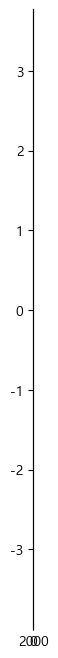

In [288]:
plt.rcParams['figure.figsize'] = [0,8]
plt.bar(range(len(lr.coef_[0])),lr.coef_[0])

In [295]:
index_vectorizer.vocabulary_.items()

dict_items([('너무/Adverb', 411), ('맛있어요/Adjective', 750), ('녹는다/Verb', 430), ('녹아/Verb', 431), ('좋아요/Adjective', 1888), ('흠잡을/Adjective', 2334), ('곳/Noun', 178), ('없는/Adjective', 1470), ('반찬/Noun', 933), ('이/Josa', 1640), ('정갈합니다/Adjective', 1845), ('코로나/Noun', 2075), ('땜/Noun', 642), ('에/Josa', 1492), ('걱정/Noun', 131), ('했는데/Verb', 2281), ('방역/Noun', 945), ('수/Modifier', 1199), ('칙/Noun', 2053), ('도/Josa', 544), ('잘/Verb', 1769), ('지키시고/Verb', 1953), ('살치실이랑/Verb', 1132), ('등심/Noun', 625), ('부드러워서/Adjective', 1022), ('좋아서/Adjective', 1887), ('댓글/Noun', 527), ('남깁니다/Verb', 383), ('살치/Verb', 1131), ('살/Noun', 1127), ('미쳤네요/Adjective', 910), ('대박/Noun', 515), ('입니다/Adjective', 1727), ('퀄리티/Noun', 2081), ('굳이/Noun', 231), ('에요/Josa', 1502), ('최고/Noun', 2030), ('외식/Noun', 1578), ('하기에/Verb', 2179), ('딱/Adverb', 631), ('좋습니다/Adjective', 1885), ('격/Noun', 145), ('자체/Noun', 1764), ('가/Josa', 17), ('다른/Noun', 473), ('음식/Noun', 1630), ('의/Josa', 1633), ('품격/Noun', 2160), ('서비스/Noun', 1163), ('마인

In [297]:
len(lr.coef_[0])

2343

In [ ]:
((value,index) for index,value in enumerate(lr.coef_[0]))
    

In [298]:
# 2343개 기울기값 index 부여
coef_pos_index = sorted(((value,index) for index,value in enumerate(lr.coef_[0])),reverse=True)

In [299]:
coef_pos_index

[(3.4235871648420733, 2030),
 (2.594352220083613, 750),
 (2.532311012529346, 1888),
 (1.566882708652672, 1567),
 (1.5382681003118033, 1904),
 (1.5255305291896666, 2058),
 (1.4250570736525088, 178),
 (1.3119590739948495, 731),
 (1.3071614097665103, 732),
 (1.3050207870206985, 466),
 (1.2979955458187777, 1870),
 (1.2339116061676614, 122),
 (1.1907204530728182, 175),
 (1.141271115324237, 662),
 (1.12980446914098, 320),
 (1.0486659959863323, 1040),
 (1.0359910718389485, 1900),
 (1.033449205789498, 1039),
 (1.0191221724011104, 1630),
 (1.0074306539005202, 760),
 (0.9669265232222594, 1727),
 (0.965143986003188, 736),
 (0.9469355655997874, 91),
 (0.9462475229857066, 1549),
 (0.9462475229857066, 745),
 (0.9462475229857066, 318),
 (0.9462475229857066, 7),
 (0.943364255173446, 740),
 (0.865701963212603, 218),
 (0.8510722222450103, 854),
 (0.8281168302374692, 1344),
 (0.8248694465283858, 216),
 (0.8162782565489312, 306),
 (0.8136046099235198, 2038),
 (0.8116282282625408, 1941),
 (0.81162822826254

In [296]:
invert_index_vectorizer = {v:k for k,v in index_vectorizer.vocabulary_.items()}
invert_index_vectorizer

{411: '너무/Adverb',
 750: '맛있어요/Adjective',
 430: '녹는다/Verb',
 431: '녹아/Verb',
 1888: '좋아요/Adjective',
 2334: '흠잡을/Adjective',
 178: '곳/Noun',
 1470: '없는/Adjective',
 933: '반찬/Noun',
 1640: '이/Josa',
 1845: '정갈합니다/Adjective',
 2075: '코로나/Noun',
 642: '땜/Noun',
 1492: '에/Josa',
 131: '걱정/Noun',
 2281: '했는데/Verb',
 945: '방역/Noun',
 1199: '수/Modifier',
 2053: '칙/Noun',
 544: '도/Josa',
 1769: '잘/Verb',
 1953: '지키시고/Verb',
 1132: '살치실이랑/Verb',
 625: '등심/Noun',
 1022: '부드러워서/Adjective',
 1887: '좋아서/Adjective',
 527: '댓글/Noun',
 383: '남깁니다/Verb',
 1131: '살치/Verb',
 1127: '살/Noun',
 910: '미쳤네요/Adjective',
 515: '대박/Noun',
 1727: '입니다/Adjective',
 2081: '퀄리티/Noun',
 231: '굳이/Noun',
 1502: '에요/Josa',
 2030: '최고/Noun',
 1578: '외식/Noun',
 2179: '하기에/Verb',
 631: '딱/Adverb',
 1885: '좋습니다/Adjective',
 145: '격/Noun',
 1764: '자체/Noun',
 17: '가/Josa',
 473: '다른/Noun',
 1630: '음식/Noun',
 1633: '의/Josa',
 2160: '품격/Noun',
 1163: '서비스/Noun',
 686: '마인드/Noun',
 899: '뭐/Noun',
 2182: '하나/Noun',
 1848: '정말/No

In [293]:
index_vectorizer.vocabulary_

{'너무/Adverb': 411,
 '맛있어요/Adjective': 750,
 '녹는다/Verb': 430,
 '녹아/Verb': 431,
 '좋아요/Adjective': 1888,
 '흠잡을/Adjective': 2334,
 '곳/Noun': 178,
 '없는/Adjective': 1470,
 '반찬/Noun': 933,
 '이/Josa': 1640,
 '정갈합니다/Adjective': 1845,
 '코로나/Noun': 2075,
 '땜/Noun': 642,
 '에/Josa': 1492,
 '걱정/Noun': 131,
 '했는데/Verb': 2281,
 '방역/Noun': 945,
 '수/Modifier': 1199,
 '칙/Noun': 2053,
 '도/Josa': 544,
 '잘/Verb': 1769,
 '지키시고/Verb': 1953,
 '살치실이랑/Verb': 1132,
 '등심/Noun': 625,
 '부드러워서/Adjective': 1022,
 '좋아서/Adjective': 1887,
 '댓글/Noun': 527,
 '남깁니다/Verb': 383,
 '살치/Verb': 1131,
 '살/Noun': 1127,
 '미쳤네요/Adjective': 910,
 '대박/Noun': 515,
 '입니다/Adjective': 1727,
 '퀄리티/Noun': 2081,
 '굳이/Noun': 231,
 '에요/Josa': 1502,
 '최고/Noun': 2030,
 '외식/Noun': 1578,
 '하기에/Verb': 2179,
 '딱/Adverb': 631,
 '좋습니다/Adjective': 1885,
 '격/Noun': 145,
 '자체/Noun': 1764,
 '가/Josa': 17,
 '다른/Noun': 473,
 '음식/Noun': 1630,
 '의/Josa': 1633,
 '품격/Noun': 2160,
 '서비스/Noun': 1163,
 '마인드/Noun': 686,
 '뭐/Noun': 899,
 '하나/Noun': 2182,
 '정말/Noun': 1

In [300]:
# 긍정 표현 높은 20개 출력
for coef in coef_pos_index[:20]:
    print(invert_index_vectorizer[coef[1]],coef[0])

최고/Noun 3.4235871648420733
맛있어요/Adjective 2.594352220083613
좋아요/Adjective 2.532311012529346
완전/Noun 1.566882708652672
좋음/Adjective 1.5382681003118033
친절하고/Adjective 1.5255305291896666
곳/Noun 1.4250570736525088
맛있게/Adjective 1.3119590739948495
맛있고/Adjective 1.3071614097665103
다/Adverb 1.3050207870206985
존맛/Noun 1.2979955458187777
거기/Noun 1.2339116061676614
곱/Noun 1.1907204530728182
랑/Josa 1.141271115324237
깔끔하고/Adjective 1.12980446914098
분위기/Noun 1.0486659959863323
좋은/Adjective 1.0359910718389485
분들/Suffix 1.033449205789498
음식/Noun 1.0191221724011104
맛있음/Adjective 1.0074306539005202


In [273]:
# 1:1 비율을 랜덤 샘플링 수행
# dfidf 수치로 변경된 X의 데이터를 가져오기 위해 index 번호를 저장
positive_random_idx = df[df['y']==1].sample(50,random_state=30).index.to_list()
nagative_random_idx = df[df['y']==0].sample(50,random_state=30).index.to_list()

In [274]:
random_idx = positive_random_idx + positive_random_idx
len(random_idx)

100

In [289]:
# 랜덤 100개 데이터셋 나누기
sample_X = X[random_idx,:]
y = df['y'][random_idx]
train_input,test_input,train_target,test_target = train_test_split(sample_X,y,test_size=0.3)
print(train_input.shape,train_target.shape)
print(test_input.shape,test_target.shape)
# print(sample_X)

(70, 2343) (70,)
(30, 2343) (30,)


In [290]:
from sklearn.linear_model import LogisticRegression
lr2 = LogisticRegression()
lr2.fit(train_input,train_target)
print(lr2.score(train_input,train_target))
print(lr2.score(test_input,test_target))

ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 1